## 문제정의
- 500명의 키,몸무게/ 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #평가를 위한 모듈
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data/bmi_500.csv', index_col='Label')

In [3]:
data   # 특성개수 = columns 개수

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [4]:
data.info()  # 전체 row수, 컬럼별정보, 결측치여부 

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [5]:
data.describe() # 빈도수,표준편차 등등 기술통계 확인 (연속형 데이터만 확인가능)

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [6]:
data.index.unique()  # .unique() 중복 값 제거

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

- Obesity : 비만
- Normal  : 정상
- Overweight : 고도비만
- Extreme Obesity : 초고도비만
- Weak : 마름
- Extremely Weak : 매우 마름

### 데이터 시각화

In [7]:
# Extreme Obesity 만 꺼내오기
data.loc['Extreme Obesity']

,Gender,Height,Weight
Label,,,
Extreme Obesity,Male,147,92
Extreme Obesity,Male,154,111
Extreme Obesity,Female,153,107
Extreme Obesity,Female,157,110
Extreme Obesity,Male,140,129
...,...,...,...
Extreme Obesity,Male,152,98
Extreme Obesity,Female,150,153
Extreme Obesity,Female,141,136


In [ ]:
plt.scatter(x축 , y축)  
예시에서 x축은 몸무게, y축은 키 
라벨에 따른 data가 필요하기 때문에 data.loc['Extreme Obesity'] 로 인덱싱
인덱싱한 데이터를 g 라는 변수 안에 넣어줌
def myScatter(label, color): -> c = color, label = label 매개변수로 받게끔 했음

In [8]:
def myScatter(Label, color):
    g = data.loc[Label]  # data.loc['Extreme Obesity'] 이 데이터가 g에 들어 있음
    plt.scatter(g['Weight'], g['Height'], c = color, label = Label) 
    # plt.scatter(x축 y축) 산정도

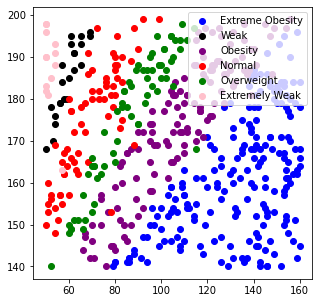

In [9]:
plt.figure(figsize = (5, 5)) # 그래프 가로, 세로 크기 지정
myScatter('Extreme Obesity', 'blue')
myScatter('Weak', 'black')
myScatter('Obesity', 'purple')
myScatter('Normal', 'red')
myScatter('Overweight', 'green')
myScatter('Extremely Weak', 'pink')

plt.legend(loc='upper right')
plt.show()

### 문제와 답 분리

In [10]:
data.reset_index(inplace=True)
data

,Label,Gender,Height,Weight
0,Obesity,Male,174,96
1,Normal,Male,189,87
2,Obesity,Female,185,110
3,Overweight,Female,195,104
4,Overweight,Male,149,61
...,...,...,...,...
495,Extreme Obesity,Female,150,153
496,Obesity,Female,184,121
497,Extreme Obesity,Female,141,136
498,Extreme Obesity,Male,150,95


In [24]:
#22.01.18 수업때 추가 Gender컬럼까지 추가해서 학습
X= data.iloc[:,1:]

In [25]:
X

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [40]:
one_hot = pd.get_dummies(X['Gender'], prefix = 'Gender')
X.drop('Gender', axis = 1, inplace = True) # 기존 object 컬럼 제거
X = pd.concat([X, one_hot], axis = 1) 
    # 기존데이터와 원핫인코딩한 데이터프레임 합치기
X

,Height,Weight,Gender_Female,Gender_Male
0,174,96,0,1
1,189,87,0,1
2,185,110,1,0
3,195,104,1,0
4,149,61,0,1
...,...,...,...,...
495,150,153,1,0
496,184,121,1,0
497,141,136,1,0
498,150,95,0,1


In [22]:
X = data.iloc[:,2:] #문제 Height : Weight
y = data.iloc[:,0]  #답 Label

In [23]:
X

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [41]:
# 훈련세트(train)와 테스트세트(test) 7:3으로 나눔

X_train = X.iloc[0:350, : ]
y_train = y.iloc[0:350]

X_test = X.iloc[350: , : ]
y_test = y.iloc[350:]

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 4)
(350,)
(150, 4)
(150,)


## 모델링
- 모델 생성 및 하이퍼파라미터 조정
- 학습 및 평가

In [43]:
knn_m = KNeighborsClassifier(n_neighbors=10)

In [44]:
#모델 학습
knn_m.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [45]:
#예측
pre = knn_m.predict(X_test)
pre

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extremely Weak', 'Obesity', 'Extreme Obesity',

In [46]:
#평가
metrics.accuracy_score(pre, y_test)

0.92

## 활용

In [49]:
knn_m.predict([[160, 58, 1, 0]])

array(['Normal'], dtype=object)